# 第二次作业

## 文件命名

在课程网提交前，请将文件重命名为 `L02-{UG/PG}-{姓名拼音}-{学号}.ipynb`，研究生为 PG，本科生为 UG。

例如：`L02-UG-gaosongdeng-2301111001.ipynb`

## 注意事项

- 在题目对应范围内用 Markdown 或代码作答。可以插入新的单元格，但注意位置。

- 文字表述尽可能简明扼要。

- 画图时，注意正确标注图题和坐标轴含义，取值范围应合理选取。

- 相对完整的功能模块、存在复杂操作逻辑的代码或代码块**需提供注释**。

- 变量命名规范一致性、模块化程度不属于考核范围，但良好的代码风格便于错误排查和作业批改。

- 如使用 Python 实现，建议参考 PEP-8 描述的代码规范。

- 如认为题目表述不够清晰，请及时联系助教。

------

## 引入的外部库和全局设置

In [2]:
import numpy as np
import matplotlib.pyplot as plt ## 绘图
import pandas  ## 读取Excel数据
import math ## 求阶乘
from scipy.optimize import minimize ## 求函数最小值对应的参数

## 习题 Q1

### Q1 (a)

刺激ω的值为：-0.004004004004003914


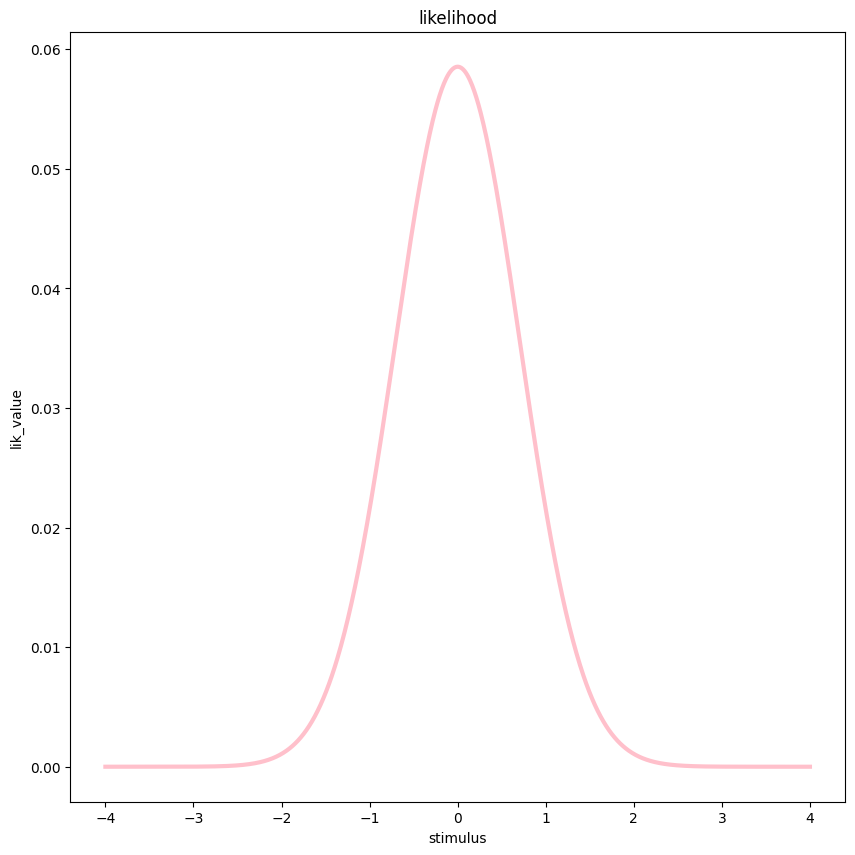

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def Gass(value, mean, sigma):
    '''创建高斯分布并返回value对应的概率值'''
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(value - mean)**2/(2*sigma**2))

def Lik(ob1, ob2, mean, sigma1, sigma2):
    '''由独立表征推出似然函数'''
    return Gass(ob1, mean, sigma1)*Gass(ob2, mean, sigma2)

σ1 = 1
σ2 = 1
s1 = -1
s2 = 1
'''基于给出的s和σ预估刺激值范围(m±3*σ)'''
omega = np.linspace(-4, 4, num = 1000)
lik = Lik(s1, s2, omega, σ1, σ2)
omegaMLE = omega[lik.argmax()]
print("刺激ω的值为：%s"%omegaMLE)

'''作图'''
plt.figure(figsize=(10, 10))
plt.plot(omega, lik, color = 'pink', label = 'likelihood', lw=3)
plt.xlabel('stimulus')
plt.ylabel('lik_value')
plt.title('likelihood')
plt.show()

### Q1 (b)


Text(0.5, 1.0, 'omega_with_s2')

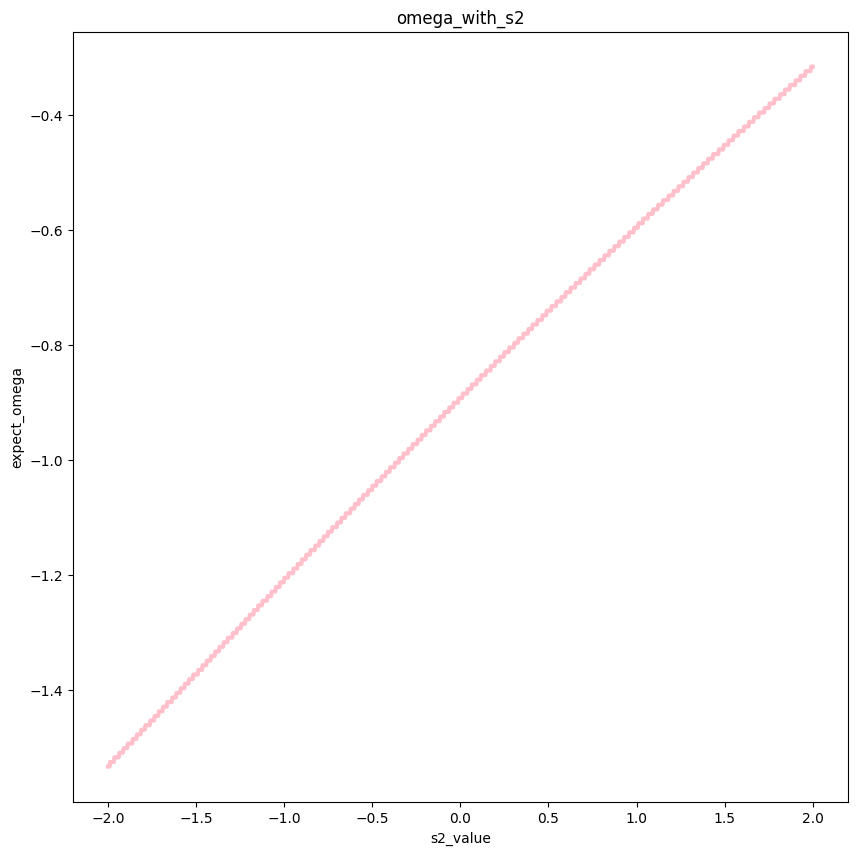

In [7]:
'''重新定义s2的值并求出对应刺激预测值'''
s2 = np.linspace(-2, 2, num = 1000)
predict = np.array(omega[Lik(s1, s2[0], omega, σ1, σ2).argmax()])
for i in s2[1:]:
    predict = np.append(predict, omega[Lik(s1, i, omega, σ1, σ2).argmax()])
    
'''作图'''
plt.figure(figsize=(10, 10))
plt.plot(s2, predict, color = 'pink', label = 'stimulus-s', lw=3)
plt.xlabel('s2_value')
plt.ylabel('expect_omega')
plt.title('omega_with_s2')


### Q1 (c)

'由图可知，随着σ2的增大，刺激值的预测值越接近于-1，即s1，说明s2的预测权重降低；\n从认知的层面上可以解读为：由于该感觉通路对同一刺激表征浮动较大，个体在对刺激值的预测时\n会更少地整合该感觉通路传来的信息。'

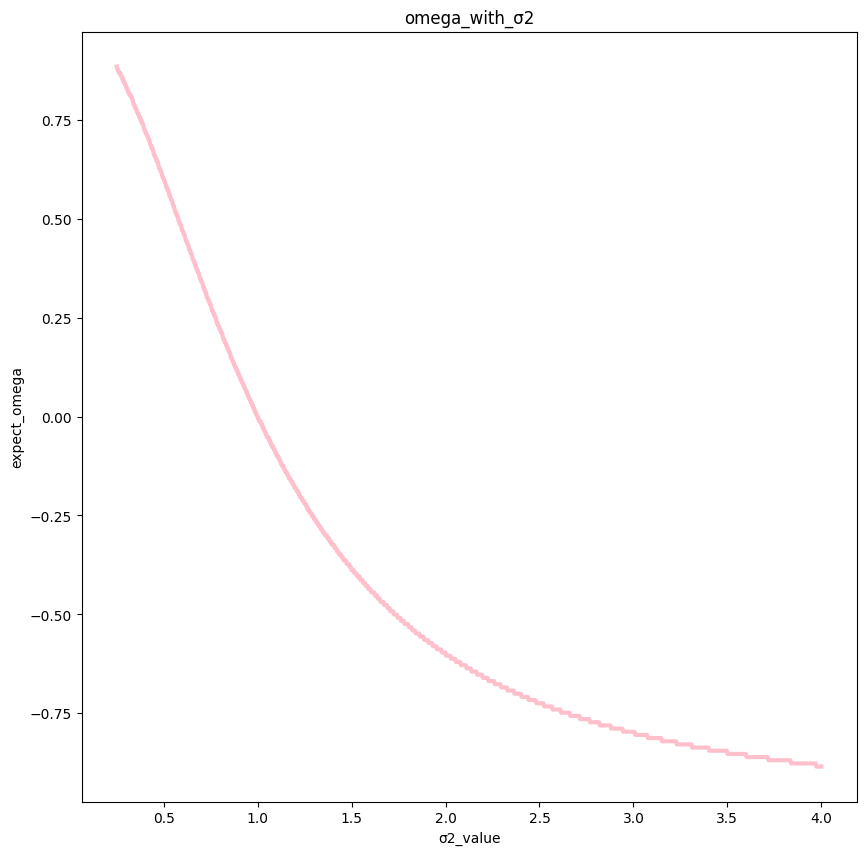

In [8]:
'''重新定义σ2的值并求出对应刺激预测值'''
σ2 = np.linspace(0.25, 4, num = 1000)
pred = np.array(omega[Lik(-1, 1, omega, 1, σ2[0]).argmax()])
for i in σ2[1:]:
    pred = np.append(pred, omega[Lik(-1, 1, omega, 1, i).argmax()])
    
'''作图'''
plt.figure(figsize=(10, 10))
plt.plot(σ2, pred, color = 'pink', label = 'stimulus-s', lw=3)
plt.xlabel('σ2_value')
plt.ylabel('expect_omega')
plt.title('omega_with_σ2')

'''由图可知，随着σ2的增大，刺激值的预测值越接近于-1，即s1，说明s2的预测权重降低；
从认知的层面上可以解读为：由于该感觉通路对同一刺激表征浮动较大，个体在对刺激值的预测时
会更少地整合该感觉通路传来的信息。'''

## 习题 Q2

### Q2 (a)

In [9]:
data = pandas.read_csv('C:/Users/86137/Desktop/Class/大二下/认知建模基础/homework/hw-2/L02Q2.csv')
def Possion(lamda, value):
    '''创建泊松分布并返回value对应的概率值'''
    return math.exp(-lamda) * (lamda**value) / math.factorial(value)

def Rescorla_Wagner(params, stimulus, reward, spike, start_w):
    '''依据Rescorla_Wagner计算出预测值'''
    learning_rate = params[0]
    '''初始化联结强度V、预测值列表、权重列表'''
    V = 0
    pred = []
    weight = [start_w]
    for idx in range(len(stimulus)):
        delta = reward[idx] - V
        lamda = max(0.1, 3 + 3*delta)
        predict = Possion(lamda, spike[idx])
        pred.append(predict)
        if idx == 0:
            pass
        else:
            weight.append(weight[-1] + learning_rate*(predict-V)*stimulus[idx])
        V += learning_rate*(predict-V)*stimulus[idx]**2
    return pred, weight

def error_prediction(params, stimulus, reward, spike, start_w):
    '''创建误差函数'''
    predict_values, weight = Rescorla_Wagner(params, stimulus, reward, spike, start_w)
    error = np.mean((predict_values - spike)**2)
    return error

stimulus = data['stimulus'].values
spike = data['spike'].values
reward = data['reward'].values
learning_rate = [0.5]
start_w = 0
result = minimize(error_prediction, learning_rate, args=(stimulus, reward, spike, start_w))
print("拟合的学习参数为：%s"%result.x[0])

拟合的学习参数为：0.4564312109184725


### Q2 (b)

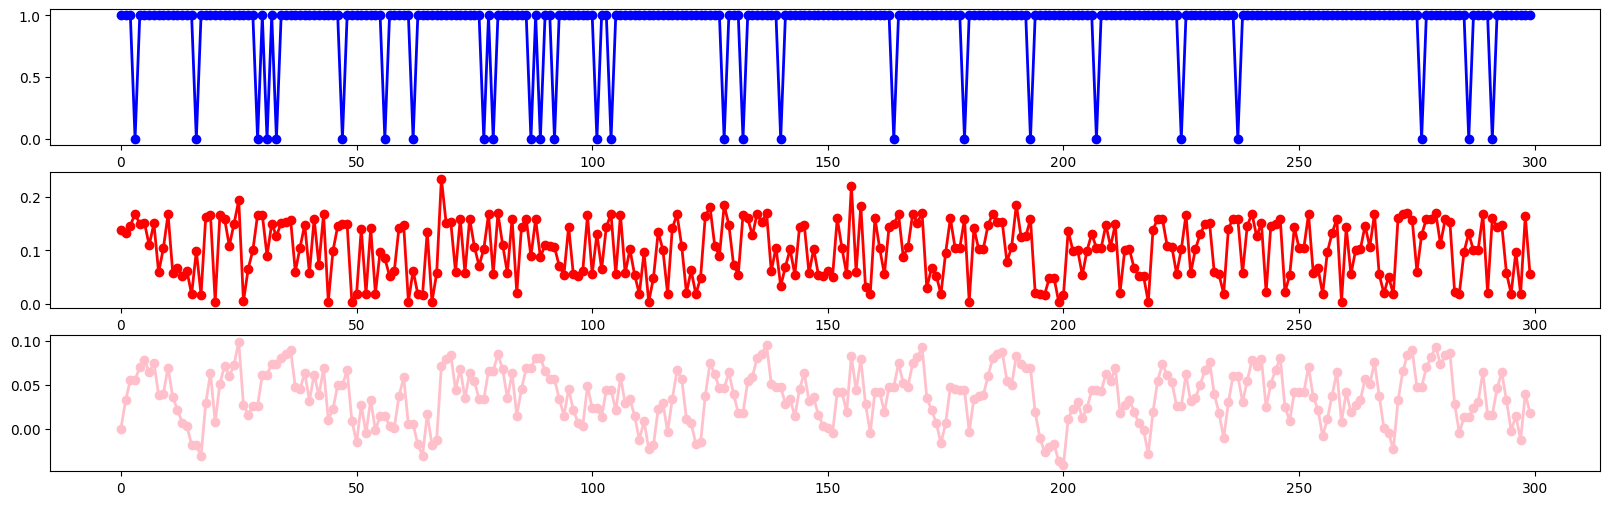

In [11]:
'''绘图刺激序列'''
plt.figure(figsize=(20, 6))
trials = np.arange(len(stimulus))
plt.subplot(3, 1, 1)
plt.plot(trials, stimulus, 'o-', color = 'blue', lw = 2)

'''绘图误差变化和权重变化'''
predict, weight = Rescorla_Wagner(result.x, stimulus, reward, spike, start_w)
plt.subplot(3, 1, 2)
plt.plot(trials, predict, 'o-', color = 'red', lw = 2)
plt.subplot(3, 1, 3)
plt.plot(trials, weight, 'o-', color = 'pink', lw = 2)

## 习题 Q3

### Q3 (a)

### Q3 (b)

### Q3 (c)

### Q3 (d)